<a href="https://colab.research.google.com/github/dcallirgos/UTE_Fundamentos_de_Programacion/blob/main/Proyecto_Final_Grupo1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conectar con Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Accediendo a los datos

In [4]:
import pandas as pd
data_2022_2 = pd.read_excel('/content/drive/MyDrive/UTEC/Data 2022-2.xls')
data_2022_1 = pd.read_excel('/content/drive/MyDrive/UTEC/Data 2022-1.xlsx')
data_2021_2 = pd.read_excel('/content/drive/MyDrive/UTEC/data_2021_2.xlsx')

In [5]:
data_2022_2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(data_2022_2.shape)
print(data_2022_1.shape)
print(data_2021_2.shape)

(68, 15)
(58, 15)
(63, 14)


#**Limpieza de filas y columnas vacias**

In [7]:
def eliminar_vacios(data):
  #Elimina filas NaN
  data = data.dropna(how='all')

  #Elimina columnas NaN
  data = data.dropna(how='all', axis=1)

  #Limpieza de encabezados
  data = data.drop(data.index[:2])

  return data

In [8]:
#Eliminar vacios
data_2022_2_clean = eliminar_vacios(data_2022_2)
data_2022_1_clean = eliminar_vacios(data_2022_1)
data_2021_2_clean = eliminar_vacios(data_2021_2)

In [9]:
data_2021_2_clean.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
5,3,F,F,F,9,14,F,F,F,F,F,Retirado
6,4,F,F,F,13,0,0,F,F,F,F,1
7,F,8,F,F,9,13,14,8,8,5,F,6
8,18,17,19,18,16,20,16,18,17,14,F,17
9,5,11,2,7,11,15,9,10,5,F,F,5


In [10]:
#Nombrar las columnas

nombre_columnas = ['Practica C1','Practica C2','Practica C3','Practica C4','Practica D1','Practica D2','Practica D3','Practica D4','Examen 1','Examen 2','Examen 3','Promedio']
len(nombre_columnas)

12

In [11]:
#Renombrar las cabeceras en la tabla
data_2022_2_clean.columns = nombre_columnas
data_2022_1_clean.columns = nombre_columnas
data_2021_2_clean.columns = nombre_columnas

#data_2022_2_clean.columns

In [12]:
#Reseteando los indices
data_2022_2_clean.reset_index(drop=True, inplace=True) #inplace hace que se sobreescriba la variable
data_2022_1_clean.reset_index(drop=True, inplace=True) #inplace hace que se sobreescriba la variable
data_2021_2_clean.reset_index(drop=True, inplace=True) #inplace hace que se sobreescriba la variable

In [13]:
#Agregar una columna al inicio del dataset
id2 = list(range(1, data_2022_2_clean.shape[0]+1))
id1 = list(range(1, data_2022_1_clean.shape[0]+1))
id3 = list(range(1, data_2021_2_clean.shape[0]+1))
#print(id)

data_2022_2_clean.insert(0, 'ID', id2)
data_2022_1_clean.insert(0, 'ID', id1)
data_2021_2_clean.insert(0, 'ID', id3)
#data_2022_2_clean.head()

In [14]:
columnas_practicas = ['Practica C1', 'Practica C2', 'Practica C3', 'Practica C4', 'Practica D1', 'Practica D2', 'Practica D3', 'Practica D4']

In [15]:
# Funcion para reemplazar strings por 0 en columnas de practicas
def replace_str(data, column):
  data[column] = data[column].applymap(lambda x: 0 if isinstance(x, str) else x)
  return data

#Aplicar la funcion en nuestros datasets
data_2022_2_rep = replace_str(data_2022_2_clean, columnas_practicas)
data_2022_1_rep = replace_str(data_2022_1_clean, columnas_practicas)
data_2021_2_rep = replace_str(data_2021_2_clean, columnas_practicas)

In [16]:
#Crear una columna que muestre el promedio de las practicas C, obviando el menor y agrega una columna con los resultados

practica_c = ['Practica C1','Practica C2','Practica C3','Practica C4']

def prom_pc(row):
    return (sum(row) - min(row)) / (len(row) - 1)
    print(row)

data_2022_2_rep['prom_pc'] = data_2022_2_rep[practica_c].apply(prom_pc, axis=1)
data_2022_1_rep['prom_pc'] = data_2022_1_rep[practica_c].apply(prom_pc, axis=1)
data_2021_2_rep['prom_pc'] = data_2021_2_rep[practica_c].apply(prom_pc, axis=1)
#print(data_2022_2['prom_pc'])

In [17]:
#Crear una columna que muestre el promedio de las practicas D, obviando el menor y agrega una columna con los resultados

practica_d = ['Practica D1','Practica D2','Practica D3','Practica D4']

def prom_pd(row):
    return (sum(row) - min(row)) / (len(row) - 1)

data_2022_2_rep['prom_pd'] = data_2022_2_rep[practica_d].apply(prom_pd, axis=1)
data_2022_1_rep['prom_pd'] = data_2022_1_rep[practica_d].apply(prom_pd, axis=1)
data_2021_2_rep['prom_pd'] = data_2021_2_rep[practica_d].apply(prom_pd, axis=1)
#print(data_2022_2['prom_pd'])

In [18]:
#Crear una columna que muestre el promedio de los examenes, reemplazando las faltas en alguno de los 2 primeros por el 3ro

examen = ['Examen 1','Examen 2','Examen 3']

# function to calculate the average marks
def calc_avg(row):
    exam1 = row['Examen 1']
    exam2 = row['Examen 2']
    exam3 = row['Examen 3']

    scores = []

    # Check Examen 1
    if str(exam1).isdigit():
        scores.append(exam1)
    else:
        scores.append(0)

    # Check Examen 2
    if str(exam2).isdigit():
        scores.append(exam2)
    else:
        if str(scores[0]).isdigit() and str(exam3).isdigit():
            scores.append(exam3)
        else:
            scores.append(0)

    return sum(scores) / 2

# Apply the custom function to each row
data_2022_2_rep['prom_ex'] = data_2022_2_rep.apply(calc_avg, axis=1)
data_2022_1_rep['prom_ex'] = data_2022_1_rep.apply(calc_avg, axis=1)
data_2021_2_rep['prom_ex'] = data_2021_2_rep.apply(calc_avg, axis=1)

# display the dataFrame
#data_2022_2.head(50)



In [19]:
#Promedio Final

import math

def round_half_up(number):
    return int(math.floor(number + 0.5))

def prom_final(row):
  prom_pc = row['prom_pc']
  prom_pd = row['prom_pd']
  prom_ex = row['prom_ex']
  return round_half_up(prom_pc*0.25 + prom_pd*0.15 + prom_ex*0.6)

data_2022_2_rep['prom_final'] = data_2022_2_rep.apply(prom_final, axis=1)
data_2022_1_rep['prom_final'] = data_2022_1_rep.apply(prom_final, axis=1)
data_2021_2_rep['prom_final'] = data_2021_2_rep.apply(prom_final, axis=1)

In [20]:
#Data Set final después del tratamiento de datos. Data final para iniciarl con los análisis
data_2021_2_rep.head()

,ID,Practica C1,Practica C2,Practica C3,Practica C4,Practica D1,Practica D2,Practica D3,Practica D4,Examen 1,Examen 2,Examen 3,Promedio,prom_pc,prom_pd,prom_ex,prom_final
0,1,3,0,0,0,9,14,0,0,F,F,F,Retirado,1.000000,7.666667,0.0,1
1,2,4,0,0,0,13,0,0,0,F,F,F,1,1.333333,4.333333,0.0,1
2,3,0,8,0,0,9,13,14,8,8,5,F,6,2.666667,12.000000,6.5,6
3,4,18,17,19,18,16,20,16,18,17,14,F,17,18.333333,18.000000,15.5,17
4,5,5,11,2,7,11,15,9,10,5,F,F,5,7.666667,12.000000,2.5,5


#**Comparacion de datos**

In [21]:
promedios_comparacion = ['prom_pc','prom_pd','prom_ex','prom_final']

In [55]:
data_2022_1_est = data_2022_1_rep[promedios_comparacion].describe().T

In [23]:
data_2022_2_est = data_2022_2_rep[promedios_comparacion].describe().T

In [24]:
data_2021_2_est = data_2021_2_rep[promedios_comparacion].describe().T

In [25]:
data_2022_1_est.insert(0, 'ID', range(1,len(data_2022_1_est)+1))
data_2022_2_est.insert(0, 'ID', range(1,len(data_2022_2_est)+1))
data_2021_2_est.insert(0, 'ID', range(1,len(data_2021_2_est)+1))

In [26]:
tabla_comparada = pd.merge(data_2022_1_est, data_2022_2_est, on='ID')

In [27]:
tabla_comparada_triple = pd.merge(tabla_comparada, data_2021_2_est, on='ID')

In [28]:
tabla_comparada.head()

,ID,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,count_y,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y
0,1,50.0,12.006667,4.538318,0.0,9.916667,12.666667,15.583333,19.000000,60.0,9.633333,5.152185,0.0,4.916667,9.833333,13.083333,19.000000
1,2,50.0,14.006667,3.211014,3.0,13.083333,14.666667,15.666667,18.666667,60.0,12.661111,3.942378,0.0,10.666667,13.166667,15.083333,19.333333
2,3,50.0,9.270000,4.456376,0.0,6.250000,9.500000,12.000000,19.500000,60.0,8.050000,5.432716,0.0,3.375000,8.500000,12.000000,19.500000
3,4,50.0,10.720000,4.150436,0.0,8.000000,11.000000,13.750000,19.000000,60.0,9.183333,4.935144,0.0,5.000000,9.500000,12.000000,19.000000


In [29]:
tabla_comparada_triple.columns

Index(['ID', 'count_x', 'mean_x', 'std_x', 'min_x', '25%_x', '50%_x', '75%_x',
       'max_x', 'count_y', 'mean_y', 'std_y', 'min_y', '25%_y', '50%_y',
       '75%_y', 'max_y', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max'],
      dtype='object')

In [30]:
import seaborn as sns

<Axes: xlabel='Practica C1', ylabel='Count'>

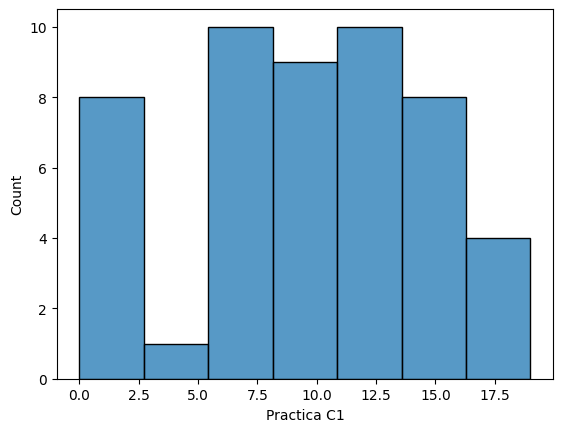

In [54]:
sns.histplot(data=data_2022_1_rep, x=data_2022_1_rep['Practica C1'])

## **TAREA**

In [32]:
# Agregar columnas calculando la variacion de los promedios
# Graficar
# Analisis de las faltas

#**Agregar columna calculando la variacion de los promedios**

In [33]:
tabla_comparada['mean_Δ'] = tabla_comparada['mean_x'] - tabla_comparada['mean_y']
tabla_comparada.head(10)

,ID,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,count_y,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y,mean_Δ
0,1,50.0,12.006667,4.538318,0.0,9.916667,12.666667,15.583333,19.000000,60.0,9.633333,5.152185,0.0,4.916667,9.833333,13.083333,19.000000,2.373333
1,2,50.0,14.006667,3.211014,3.0,13.083333,14.666667,15.666667,18.666667,60.0,12.661111,3.942378,0.0,10.666667,13.166667,15.083333,19.333333,1.345556
2,3,50.0,9.270000,4.456376,0.0,6.250000,9.500000,12.000000,19.500000,60.0,8.050000,5.432716,0.0,3.375000,8.500000,12.000000,19.500000,1.220000
3,4,50.0,10.720000,4.150436,0.0,8.000000,11.000000,13.750000,19.000000,60.0,9.183333,4.935144,0.0,5.000000,9.500000,12.000000,19.000000,1.536667


In [34]:
tabla_comparada_triple.head()

,ID,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,count_y,...,75%_y,max_y,count,mean,std,min,25%,50%,75%,max
0,1,50.0,12.006667,4.538318,0.0,9.916667,12.666667,15.583333,19.000000,60.0,...,13.083333,19.000000,58.0,12.005747,4.871643,0.0,9.750000,12.833333,15.166667,19.666667
1,2,50.0,14.006667,3.211014,3.0,13.083333,14.666667,15.666667,18.666667,60.0,...,15.083333,19.333333,58.0,14.701149,3.740975,0.0,14.083333,15.333333,17.250000,19.333333
2,3,50.0,9.270000,4.456376,0.0,6.250000,9.500000,12.000000,19.500000,60.0,...,12.000000,19.500000,58.0,9.241379,4.672842,0.0,6.125000,10.500000,12.375000,18.000000
3,4,50.0,10.720000,4.150436,0.0,8.000000,11.000000,13.750000,19.000000,60.0,...,12.000000,19.000000,58.0,10.758621,4.321754,0.0,9.000000,12.000000,13.000000,19.000000


#**Graficar**

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def grafico_barras(tabla,posicion,titulo,xlabel,ylabel):
  # Renombrar columnas de la tabla
  tabla = tabla.rename(columns={'mean':'Ciclo 2021-2', 'mean_x':'Ciclo 2022-1', 'mean_y':'Ciclo 2022-2'})

  # Calculamos los cuartiles
  quartiles = tabla[['Ciclo 2021-2','Ciclo 2022-1','Ciclo 2022-2']].iloc[posicion].transpose().reset_index()
  #quartiles = quartiles.melt(id_vars='index', var_name='quartile', value_name='value')

  # Creamos la figura
  plt.figure(figsize=(10, 6))

  # Creamos el gráfico de barras
  barplot = sns.barplot(x='index', y=posicion, data=quartiles, palette='Set1')

  # Configuramos las propiedades visuales del gráfico
  plt.title(titulo)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  #plt.legend(title=legend)

  # Agregamos el valor numérico a cada barra
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points')

  # Mostramos el gráfico
  plt.show()



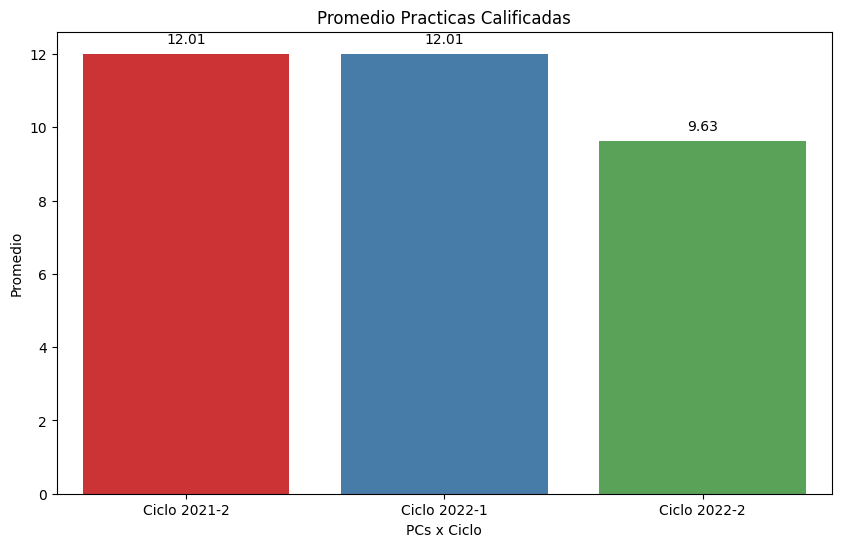

In [36]:
#PC
grafico_barras(tabla_comparada_triple, 0,'Promedio Practicas Calificadas','PCs x Ciclo','Promedio')

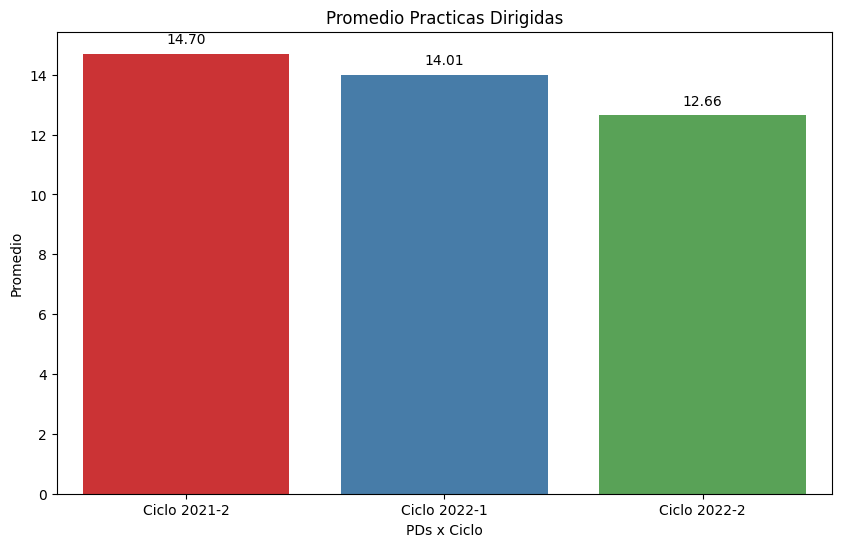

In [37]:
#PD
grafico_barras(tabla_comparada_triple, 1,'Promedio Practicas Dirigidas','PDs x Ciclo','Promedio')

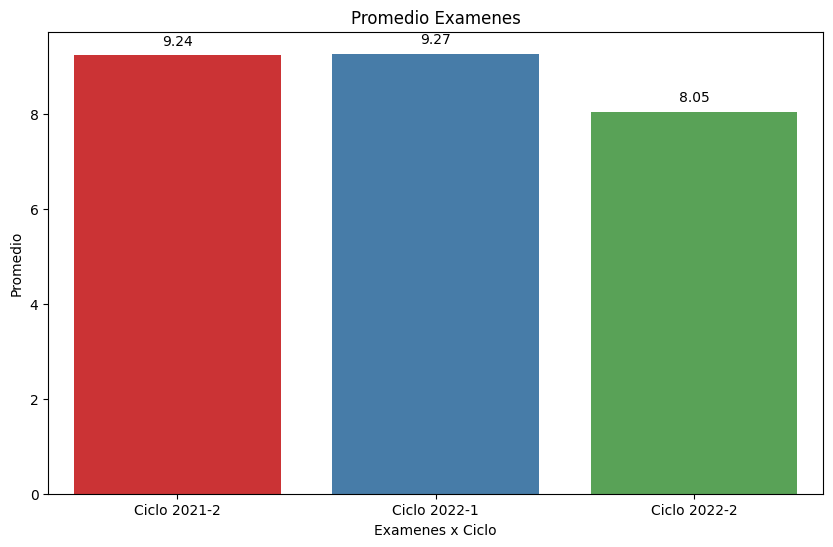

In [38]:
#Examenes
grafico_barras(tabla_comparada_triple, 2,'Promedio Examenes','Examenes x Ciclo','Promedio')

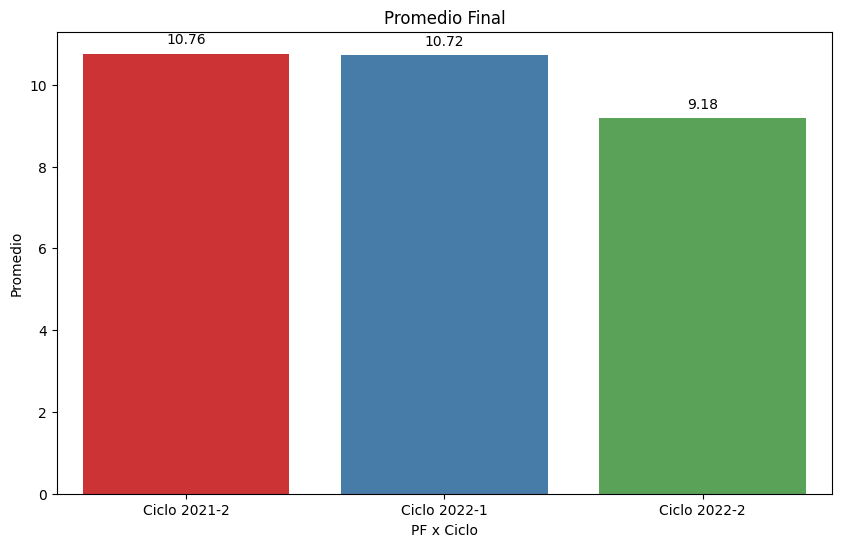

In [39]:
#Promedio Final
grafico_barras(tabla_comparada_triple, 3,'Promedio Final','PF x Ciclo','Promedio')

#**Analisis de las faltas**

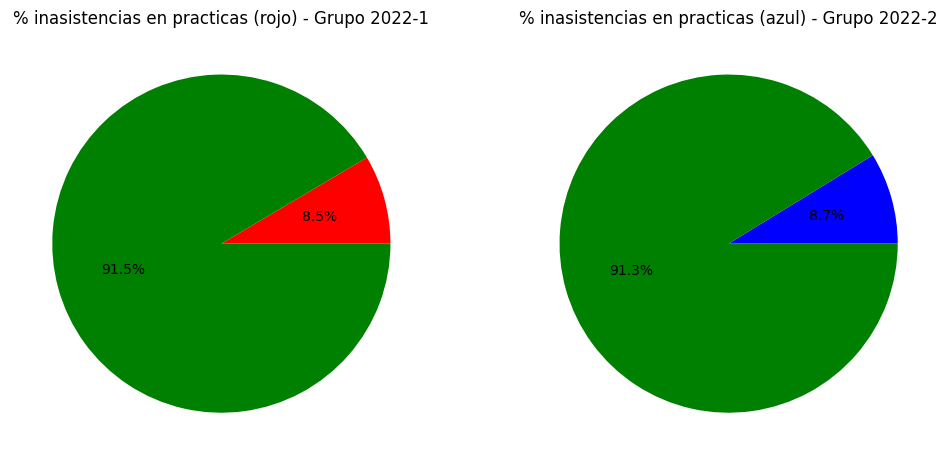

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar columnas que contengan "Practica" en su nombre
practica_columns = [col for col in data_2022_1_rep.columns if "Practica" in col]

# Calcular el número de inasistencias para cada dataset
inasistencias_1 = (data_2022_1_rep[practica_columns] == 0).sum().sum()
inasistencias_2 = (data_2022_2_rep[practica_columns] == 0).sum().sum()

# Calcular el porcentaje de inasistencias
total_1 = data_2022_1_rep[practica_columns].size
total_2 = data_2022_2_rep[practica_columns].size
porcentaje_inasistencias_1 = (inasistencias_1 / total_1) * 100
porcentaje_inasistencias_2 = (inasistencias_2 / total_2) * 100

# Datos para gráfico de Grupo 1
sizes1 = [porcentaje_inasistencias_1, 100 - porcentaje_inasistencias_1]
#labels1 = [f'Inasistencias {porcentaje_inasistencias_1:.2f}%', f'Asistencias {100 - porcentaje_inasistencias_1:.2f}%']

# Datos para gráfico de Grupo 2
sizes2 = [porcentaje_inasistencias_2, 100 - porcentaje_inasistencias_2]
#labels2 = [f'Inasistencias {porcentaje_inasistencias_2:.2f}%', f'Asistencias {100 - porcentaje_inasistencias_2:.2f}%']

# Crear gráfico de pastel para Grupo 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes1,  colors=['red', 'green'], autopct='%1.1f%%')
plt.title("% inasistencias en practicas (rojo) - Grupo 2022-1")

# Crear gráfico de pastel para Grupo 2
plt.subplot(1, 2, 2)
plt.pie(sizes2, colors=['blue', 'green'], autopct='%1.1f%%')
plt.title("% inasistencias en practicas (azul) - Grupo 2022-2")

# Mostrar gráficos
plt.show()


# **Gráfica de Dispersión**
Muestra la comparación de los promedios finales entre los ciclos en modalidad virtual vs el ciclo en modalidad prescencial

In [41]:
import pandas as pd
import seaborn as sns

In [42]:
print(data_2021_2_rep.shape)
print(data_2022_1_rep.shape)
print(data_2022_2_rep.shape)

(58, 17)
(50, 17)
(60, 17)


In [50]:
data_2021_2_rep.head()

,ID,Practica C1,Practica C2,Practica C3,Practica C4,Practica D1,Practica D2,Practica D3,Practica D4,Examen 1,Examen 2,Examen 3,Promedio,prom_pc,prom_pd,prom_ex,prom_final
0,1,3,0,0,0,9,14,0,0,F,F,F,Retirado,1.000000,7.666667,0.0,1
1,2,4,0,0,0,13,0,0,0,F,F,F,1,1.333333,4.333333,0.0,1
2,3,0,8,0,0,9,13,14,8,8,5,F,6,2.666667,12.000000,6.5,6
3,4,18,17,19,18,16,20,16,18,17,14,F,17,18.333333,18.000000,15.5,17
4,5,5,11,2,7,11,15,9,10,5,F,F,5,7.666667,12.000000,2.5,5


In [68]:
data_2021_2_rep['prom_final'].describe()

count    58.000000
mean     10.758621
std       4.321754
min       0.000000
25%       9.000000
50%      12.000000
75%      13.000000
max      19.000000
Name: prom_final, dtype: float64

In [48]:
#Función que automatiza la generación de los gráficos de dispersión a partir de dos entradas:
#tabla : Es el Data Frame a utilizar
#titulo: Es el título que queremos para el gráfico

def grafico_dispersion(tabla,titulo):
  sns.scatterplot(data = tabla, x = 'prom_pc', y = 'prom_pd', hue = 'prom_final')

  # Configuramos las propiedades visuales del gráfico
  plt.title(titulo)
  plt.xlabel('Práctica Calificada')
  plt.ylabel('Práctica Dirigida')
  plt.show()

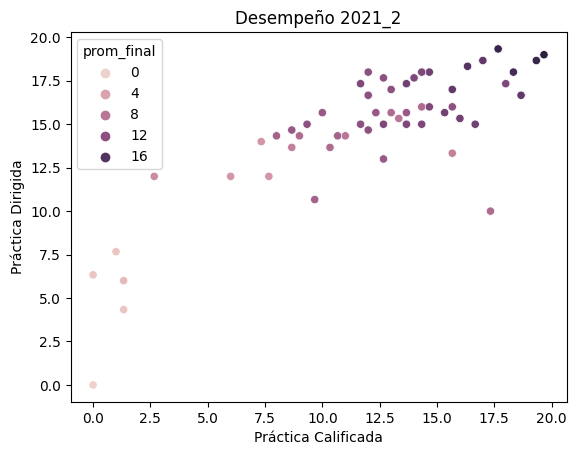

In [49]:
grafico_dispersion(data_2021_2_rep, 'Desempeño 2021_2')

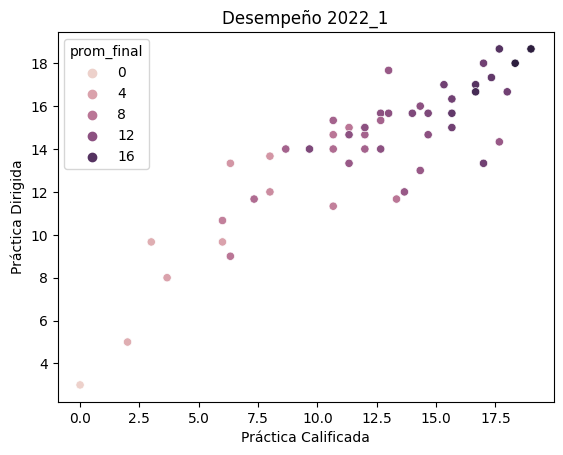

In [46]:
grafico_dispersion(data_2022_1_rep, 'Desempeño 2022_1')

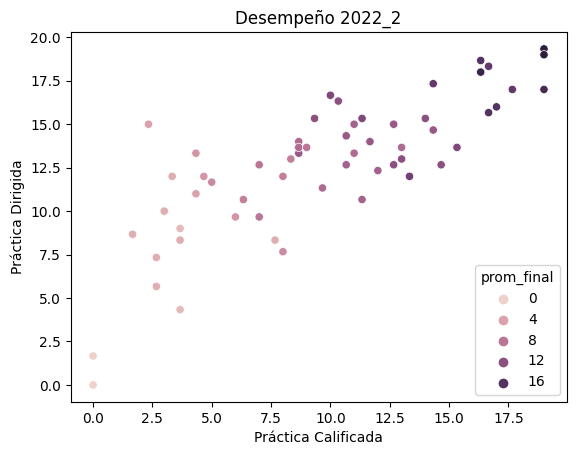

In [47]:
grafico_dispersion(data_2022_2_rep, 'Desempeño 2022_2')